# Exercise: Getting started

In the first session, we discussed some fundamental machine learning aspects and started to play around with small data sets.

The goal of this exercise is to follow up on some of the issues we discussed by writing and executing code to do so.

---

Note: if you have not yet completed the exercise notebook in the `0_pre_class` folder, we highly recommend to do that.

Answer below questions.
The code snippeds already contained in the notebook will provide you with hints.

- **For each question, give the answer by adding it to this cell.**
- **Submit your answers through this [form](https://forms.gle/sdNE14DLDWLq3Ccv9).**

## Questions

### Moons
1. Focusing on the `KNeighborsClassifier`, investigate the relationship between
   - `n_samples`
   - `noise`
   - `n_neighbors`
   
   by
   - a) Setting a larger but fixed value for `n_samples` and `noise` and 
        varying `n_neighbors`.
   - b) Setting a lower but fixed value for `noise` and varying `n_neighbors`.
   - c) Keeping `n_neighbors` fixed and varying `n_samples` and `noise`. 

   What do you observe and how do you interpret the result? How does the decision
   boundary look like?
   In each case, document the parameter values as well. 
   Start by making small changes (and, to guide your reasoning, ask yourself how you would 
   decide in each situation; like we did in class).


2. Compare the decision boundaries between the `RandomForestClassifier` and 
   the `KNeighborsClassifier`. How do they differ?

### Advertising
1. What does computing 
   [`df.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) 
   tell you about our data, interpret the 
   [correlation coefficients](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient).
1. What does 
   [`pd.plotting.scatter_matrix()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html)
   tell us about the data?

## Answers
### Moons
1. ...
  - a) TBA
  - b) TBA
1. TBA

### Advertising
1. TBA
1. TBA

# Moons

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

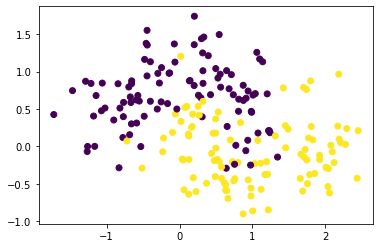

In [1]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.datasets import make_moons


def load_data(**wargs):
    # experiment by setting the parameters to different values 
    # and observe the result
    return make_moons(n_samples=200, noise=0.3, random_state=42)

def visualize_data(X, y):
    fig, ax = plt.subplots()
    ax.scatter(X[:, 0], X[:, 1], c=y)
    return fig, ax


X, y = load_data()
visualize_data(X, y)

<AxesSubplot:>

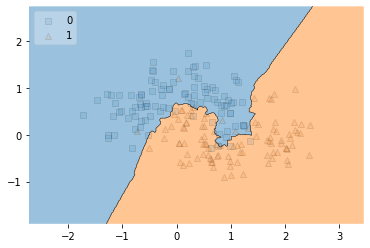

In [2]:
# 1. chose a model
from sklearn.neighbors import KNeighborsClassifier
# 2. set model parameters (perform parameter search e.g. using GridSearchCV)
# for this exercise, we set the parameters manually to understand their effect
model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
# 3. fit model
model.fit(X, y)
# 4. predict
model.predict(X)
# 5. inspect
plot_decision_regions(X, y, clf=model, legend=2, scatter_kwargs={'alpha': 0.1})
# by setting alpha to a lower value, the markers become transparent, making it
# easier to see the decision regions

<AxesSubplot:>

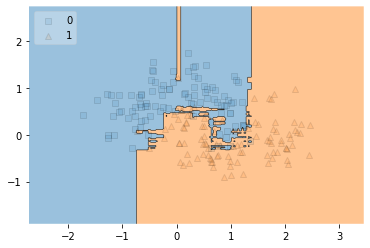

In [3]:
# 1. chose a model
from sklearn.ensemble import RandomForestClassifier
# 2. set model parameters (perform parameter search e.g. using GridSearchCV)
# for this exercise, we set the parameters manually to understand their effect
model = RandomForestClassifier(n_estimators=20, random_state=42)
# 3. fit model
model.fit(X, y)
# 4. predict
model.predict(X)
# 5. inspect
plot_decision_regions(X, y, clf=model, legend=2, scatter_kwargs={'alpha': 0.1})

# Advertising Data

In [4]:
# to use pandas, we first need to import it
import pandas as pd

%matplotlib inline
# we can read in the data (a csv file) using the corresponding function as follows
df = pd.read_csv('http://faculty.marshall.usc.edu/gareth-james/ISL/Advertising.csv', index_col=0)
df

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [5]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


array([[<AxesSubplot:xlabel='TV', ylabel='TV'>,
        <AxesSubplot:xlabel='radio', ylabel='TV'>,
        <AxesSubplot:xlabel='newspaper', ylabel='TV'>,
        <AxesSubplot:xlabel='sales', ylabel='TV'>],
       [<AxesSubplot:xlabel='TV', ylabel='radio'>,
        <AxesSubplot:xlabel='radio', ylabel='radio'>,
        <AxesSubplot:xlabel='newspaper', ylabel='radio'>,
        <AxesSubplot:xlabel='sales', ylabel='radio'>],
       [<AxesSubplot:xlabel='TV', ylabel='newspaper'>,
        <AxesSubplot:xlabel='radio', ylabel='newspaper'>,
        <AxesSubplot:xlabel='newspaper', ylabel='newspaper'>,
        <AxesSubplot:xlabel='sales', ylabel='newspaper'>],
       [<AxesSubplot:xlabel='TV', ylabel='sales'>,
        <AxesSubplot:xlabel='radio', ylabel='sales'>,
        <AxesSubplot:xlabel='newspaper', ylabel='sales'>,
        <AxesSubplot:xlabel='sales', ylabel='sales'>]], dtype=object)

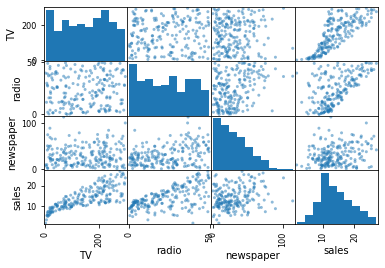

In [6]:
pd.plotting.scatter_matrix(df)

## Questions & Answers

### Moons

In [7]:
def decision_region_for_data_set(n_samples=200, noise=0.3, n_neighbors=10):
    X, y = make_moons(n_samples=n_samples, noise=noise, random_state=42)
    model = KNeighborsClassifier(n_neighbors=n_neighbors, n_jobs=-1)
    model.fit(X, y)
    fig, ax = plt.subplots()
    ax.set_title(f'n_samples={n_samples}, noise={noise}, n_neighbors={n_neighbors}')
    return plot_decision_regions(X, y, clf=model, legend=2, scatter_kwargs={'alpha': 0.1}, ax=ax)

1. Focusing on the `KNeighborsClassifier`, investigate the relationship between
   - `n_samples`
   - `noise`
   - `n_neighbors`
   
   by
   - a) Setting a larger but fixed value for `n_samples` and `noise` and 
        varying `n_neighbors`.
   - b) Setting a lower but fixed value for `noise` and varying `n_neighbors`.
   - c) Keeping `n_neighbors` fixed and varying `n_samples` and `noise`. 

   What do you observe and how do you interpret the result? How does the decision
   boundary look like?
   In each case, document the parameter values as well. 
   Start by making small changes (and, to guide your reasoning, ask yourself how you would 
   decide in each situation; like we did in class).

## Before we go into details I

- What is your intuitive understanding of these parameters?
- Which parameters do we have control over in a real world use case?

- `n_samples` is fixed, this is the data you have. Maybe it is expensive to collect. Maybe it will grow over time.
Usually, the more data the better.
- `noise` is unknown (`noise` is not to be confused with *unobserved variables*).
- `n_neighbors` the only parameter you really have control over. This is the knob you tune to get the most out of your data (i.e. learn something useful.

---

Turning the knobs to tune a model to achieve the best possible outcome is a big part of *doing* ML. For now, we turn the knob by hand.

## Before we go into details II

How does the ideal world look like?

<AxesSubplot:title={'center':'n_samples=100, noise=0, n_neighbors=50'}>

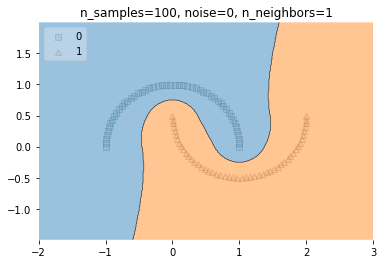

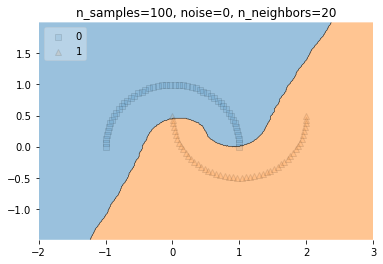

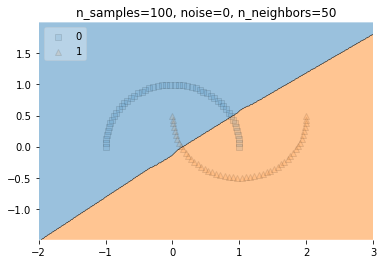

In [8]:
# Ideal world
N_SAMPLES = 100
NOISE = 0
# A very flexible model captures every detail. In this case, this works really well as there is no noise.
decision_region_for_data_set(n_neighbors=1, n_samples=100, noise=0)
# As we decrease flexibility, we the relationships gets simplified and eventually does no longer 
# represent the true shape.
decision_region_for_data_set(n_neighbors=20, n_samples=100, noise=0)
decision_region_for_data_set(n_neighbors=50, n_samples=100, noise=0)

1/a) Setting a larger but fixed value for `n_samples` and `noise` and varying `n_neighbors`.

What do you observe and how do you interpret the result? How does the decision boundary look like?

<AxesSubplot:title={'center':'n_samples=1000, noise=1, n_neighbors=200'}>

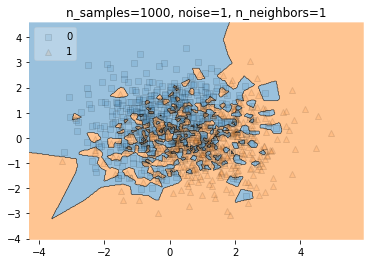

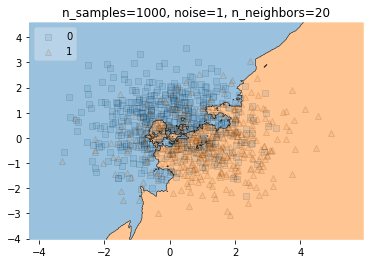

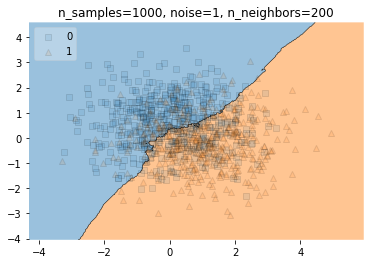

In [9]:
N_SAMPLES = 1000
NOISE = 1
# Hardly anything to see here; the model learns details in the data that are only noise.
decision_region_for_data_set(n_neighbors=1, n_samples=N_SAMPLES, noise=NOISE)
# Still difficult.
decision_region_for_data_set(n_neighbors=20, n_samples=N_SAMPLES, noise=NOISE)
# By reducing the the flexibility of the model, we extract a pattern a do "what makes most sense"; yet, 
# the noise very much blurs the relationship.
decision_region_for_data_set(n_neighbors=200, n_samples=N_SAMPLES, noise=NOISE)

1/b) Setting a lower but fixed value for `noise` and varying `n_neighbors`.

What do you observe and how do you interpret the result? How does the decision boundary look like?

<AxesSubplot:title={'center':'n_samples=100, noise=0.3, n_neighbors=50'}>

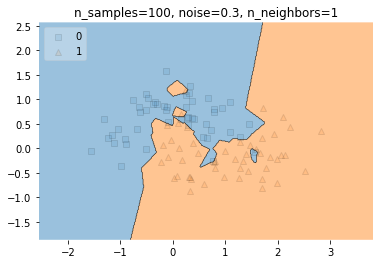

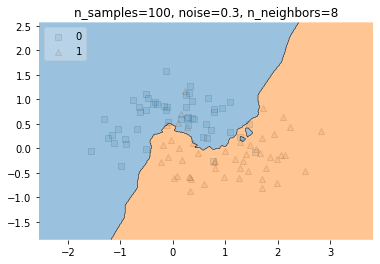

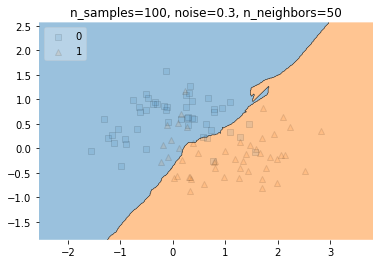

In [10]:
N_SAMPLES = 100
NOISE = 0.3
# If we choose n_neighbors too small (=1) the boundary becomes too flaky; the model is too flexible.
decision_region_for_data_set(n_neighbors=1, n_samples=N_SAMPLES, noise=NOISE)
# There seems to be a good choice that roughly captures the shape of the expected boundary.
decision_region_for_data_set(n_neighbors=8, n_samples=N_SAMPLES, noise=NOISE)
# If we choose n_neighbors too large (=50) we loose details; the model is no longer flexible enough.
decision_region_for_data_set(n_neighbors=50, n_samples=N_SAMPLES, noise=NOISE)

1/c) Keeping `n_neighbors` fixed and varying `n_samples` and `noise`. 

What do you observe and how do you interpret the result? How does the decision boundary look like?

<AxesSubplot:title={'center':'n_samples=100, noise=1, n_neighbors=5'}>

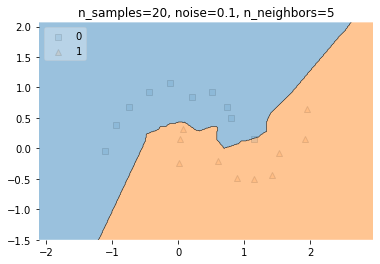

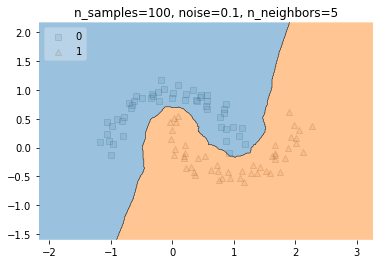

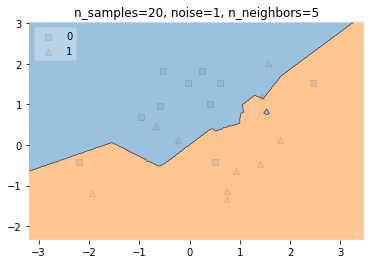

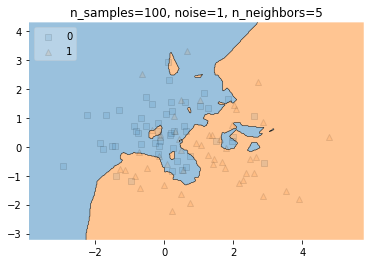

In [11]:
N_NEIGHBORS = 5
# Little data and little noise: maybe we learn something
decision_region_for_data_set(n_samples=20, noise=0.1, n_neighbors=N_NEIGHBORS)
# More data and little noise: that is convenient
decision_region_for_data_set(n_samples=100, noise=0.1, n_neighbors=N_NEIGHBORS)
# Little data and large noise: nothing to do here
decision_region_for_data_set(n_samples=20, noise=1, n_neighbors=N_NEIGHBORS)
# More data and more noise: maybe we can extract a pattern; in this case n_neighbors is too small
decision_region_for_data_set(n_samples=100, noise=1, n_neighbors=N_NEIGHBORS)

2. Compare the decision boundaries between the `RandomForestClassifier` and 
   the `KNeighborsClassifier`. How do they differ?

The `RandomForestClassifier` exhibits linear and horizontal 
decision boundaries whereas the `KNeighborsClassifier` does 
not assume any specific form (apart from forming neighborhoods).

---

A random forest is a tree based model. Decision trees segmentize 
the feature/input space by applying conditions on each feature, i.e. $x_1 < 0.5$, hence the form.

### Advertising

1. What does computing 
   [`df.corr()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html) 
   tell you about our data, interpret the 

The correlation coefficient is a measure of correlation between two variables, i.e. it describes how well a relationship between to two variables can be described using a linear ([Pearson](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)) or monotonic ([Spearman](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)) function. It has a value between -1 and +1, where
- -1 is total negative correlation
- 0 is no correlation
- +1 is total positive correlation

---

*Always compute correlations to better understand your data!*

1. What does 
   [`pd.plotting.scatter_matrix()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html)
   tell us about the data?

It creates creates nxn plots where
- off the diagonal: scatter plots are used to visualize correlation between variables
- on the diagonal: the distribution of a variable is visualized